# Regridding ERA5 Data

In [1]:
import numpy as np

from ddsapi import Client

from geokube import AxisType, CoordType, Domain, RegularLatLon
from geokube.core.abstract.coordinate import Coordinate

### Retrieving Data with `ddsapi`

In [2]:
dataset = 'era5-single-levels'
request = {
    'product_type': 'reanalysis',
    'variable': '2_metre_temperature',
    'area': {'south': 35.0, 'north': 48.0, 'west': 4.0, 'east': 20.0},
    'time': {'start': '2019-01-01T06', 'stop': '2019-01-01T08'},
    'format': 'netcdf'
}

dcube = Client(quiet=True).retrieve(dataset, request)

In [3]:
temperature = dcube['2_metre_temperature']

In [4]:
temperature.domain

### Defining Target Domain

In [5]:
lat_step, lon_step = 0.1, 0.1
method = 'bilinear'

In [6]:
coords = temperature.domain.coordinate
lat, lon = coords('latitude').values, coords('longitude').values

domain = Domain(
    coordinates=[
        Coordinate(
            dims=('latitude',),
            data=np.arange(lat.min(), lat.max() + 0.5 * lat_step, lat_step),
            name='latitude',
            coord_type=CoordType.DIMENSION,
            axis_type=AxisType.LATITUDE
        ),
        Coordinate(
            dims=('longitude',),
            data=np.arange(lon.min(), lon.max() + 0.5 * lon_step, lon_step),
            name='longitude',
            coord_type=CoordType.DIMENSION,
            axis_type=AxisType.LONGITUDE
        )
    ],
    crs=RegularLatLon()
)

In [7]:
domain

In [8]:
regrid_t = temperature.regrid(domain)
regrid_t.to_dict()

{'type': 'float32',
 'description': '2 metre temperature',
 'domain': {'coord_system': {'semi_major_axis': 6371229.0,
   'semi_minor_axis': 6371229.0,
   'inverse_flattening': 0.0,
   'longitude_of_prime_meridian': 0.0,
   'name': 'latitude_longitude'},
  'time': {'values': array(['2019-01-01T06:00:00.000000000', '2019-01-01T07:00:00.000000000',
          '2019-01-01T08:00:00.000000000'], dtype='<U48'),
   'coord_type': 'dimension'},
  'longitude': {'values': array([ 4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,
           5.1,  5.2,  5.3,  5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,
           6.2,  6.3,  6.4,  6.5,  6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,
           7.3,  7.4,  7.5,  7.6,  7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,
           8.4,  8.5,  8.6,  8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,
           9.5,  9.6,  9.7,  9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5,
          10.6, 10.7, 10.8, 10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6,
       

### Visualizing Original and Regridded Data

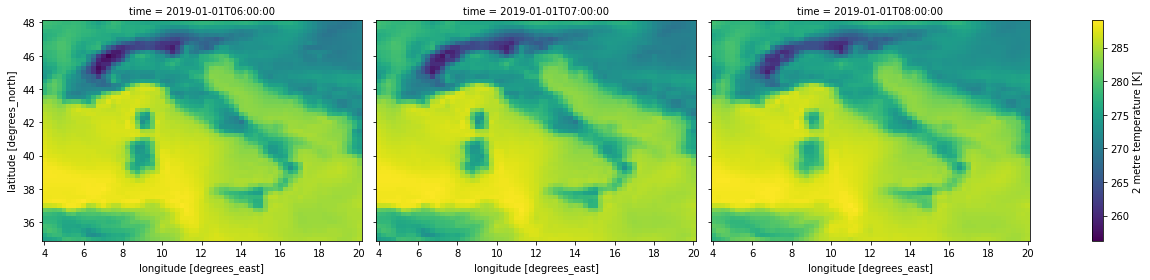

In [9]:
temperature.plot(figsize=(18, 4))

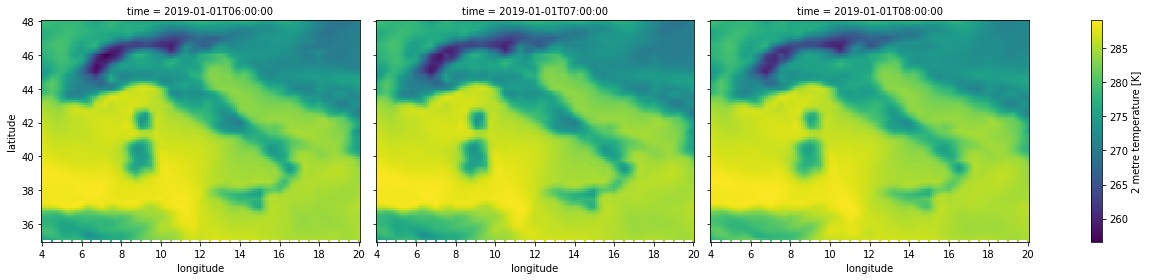

In [10]:
regrid_t.plot(figsize=(18, 4))